In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [2]:
LINK='https://docs.google.com/spreadsheets/d/e/2PACX-1vQ_k3ZNACxk7W3AZgZou3pLcG9eDN06Zr2J8BXrKQA5vQwlHO6hsStmY4n1fcs74ltvWdazrPazF2cv/pub?gid=0&single=true&output=csv'
df=pd.read_csv(LINK)
df

,Date,A2M,AGL,ALL,ALQ,ALU,ALX,AMC,AMP,ANN,ANZ,APA,AST,ASX,AWC,AZI
0,31-03-2015,0.565,12.05138,7.722321,4.071951,4.020982,2.850645,11.46534,5.235028,23.80152,27.24898,7.118765,1.107528,34.24102,1.107821,3.735887
1,01-04-2015,0.565,11.96416,7.740642,4.014477,3.984839,2.859417,11.44901,5.259415,24.96784,27.10768,7.047972,1.118907,34.31544,1.087113,3.705076
2,02-04-2015,0.555,11.98795,7.703999,3.965224,4.039055,2.912048,11.57967,5.316318,24.74321,27.27129,7.087301,1.122700,34.09218,1.087113,3.751293
3,07-04-2015,0.545,12.05138,7.621555,4.178678,4.102306,2.868188,11.65317,5.300060,25.04559,27.44235,7.260352,1.107528,34.34852,1.121625,3.812915
4,08-04-2015,0.540,11.92452,7.649037,4.260772,4.174593,2.894504,11.67767,5.365091,25.00239,27.36054,7.276089,1.130286,34.40640,1.125076,3.812915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,26-03-2020,16.000,16.07000,20.450000,5.110000,26.990000,5.270000,12.64000,1.235000,23.92000,16.70000,9.730000,1.685000,71.30000,1.525000,4.230000
1265,27-03-2020,15.870,15.93000,20.170000,5.390000,26.000000,5.320000,12.54000,1.270000,23.21000,15.47000,9.730000,1.705000,72.53000,1.445000,4.410000
1266,30-03-2020,16.880,16.98000,21.590000,5.580000,28.020000,5.960000,13.00000,1.335000,29.03000,16.78000,10.410000,1.735000,77.50000,1.570000,4.830000
1267,31-03-2020,16.600,17.19000,21.350000,5.560000,28.590000,5.510000,13.04000,1.335000,27.19000,16.96000,10.260000,1.710000,77.09000,1.460000,4.230000


In [3]:
df['Date'].dtype

dtype('O')

In [4]:
df=df.set_index(df['Date'])

In [5]:
df

,Date,A2M,AGL,ALL,ALQ,ALU,ALX,AMC,AMP,ANN,ANZ,APA,AST,ASX,AWC,AZI
Date,,,,,,,,,,,,,,,,
31-03-2015,31-03-2015,0.565,12.05138,7.722321,4.071951,4.020982,2.850645,11.46534,5.235028,23.80152,27.24898,7.118765,1.107528,34.24102,1.107821,3.735887
01-04-2015,01-04-2015,0.565,11.96416,7.740642,4.014477,3.984839,2.859417,11.44901,5.259415,24.96784,27.10768,7.047972,1.118907,34.31544,1.087113,3.705076
02-04-2015,02-04-2015,0.555,11.98795,7.703999,3.965224,4.039055,2.912048,11.57967,5.316318,24.74321,27.27129,7.087301,1.122700,34.09218,1.087113,3.751293
07-04-2015,07-04-2015,0.545,12.05138,7.621555,4.178678,4.102306,2.868188,11.65317,5.300060,25.04559,27.44235,7.260352,1.107528,34.34852,1.121625,3.812915
08-04-2015,08-04-2015,0.540,11.92452,7.649037,4.260772,4.174593,2.894504,11.67767,5.365091,25.00239,27.36054,7.276089,1.130286,34.40640,1.125076,3.812915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-03-2020,26-03-2020,16.000,16.07000,20.450000,5.110000,26.990000,5.270000,12.64000,1.235000,23.92000,16.70000,9.730000,1.685000,71.30000,1.525000,4.230000
27-03-2020,27-03-2020,15.870,15.93000,20.170000,5.390000,26.000000,5.320000,12.54000,1.270000,23.21000,15.47000,9.730000,1.705000,72.53000,1.445000,4.410000
30-03-2020,30-03-2020,16.880,16.98000,21.590000,5.580000,28.020000,5.960000,13.00000,1.335000,29.03000,16.78000,10.410000,1.735000,77.50000,1.570000,4.830000


In [6]:
df=df.drop('Date',axis=1)

In [7]:
df

,A2M,AGL,ALL,ALQ,ALU,ALX,AMC,AMP,ANN,ANZ,APA,AST,ASX,AWC,AZI
Date,,,,,,,,,,,,,,,
31-03-2015,0.565,12.05138,7.722321,4.071951,4.020982,2.850645,11.46534,5.235028,23.80152,27.24898,7.118765,1.107528,34.24102,1.107821,3.735887
01-04-2015,0.565,11.96416,7.740642,4.014477,3.984839,2.859417,11.44901,5.259415,24.96784,27.10768,7.047972,1.118907,34.31544,1.087113,3.705076
02-04-2015,0.555,11.98795,7.703999,3.965224,4.039055,2.912048,11.57967,5.316318,24.74321,27.27129,7.087301,1.122700,34.09218,1.087113,3.751293
07-04-2015,0.545,12.05138,7.621555,4.178678,4.102306,2.868188,11.65317,5.300060,25.04559,27.44235,7.260352,1.107528,34.34852,1.121625,3.812915
08-04-2015,0.540,11.92452,7.649037,4.260772,4.174593,2.894504,11.67767,5.365091,25.00239,27.36054,7.276089,1.130286,34.40640,1.125076,3.812915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-03-2020,16.000,16.07000,20.450000,5.110000,26.990000,5.270000,12.64000,1.235000,23.92000,16.70000,9.730000,1.685000,71.30000,1.525000,4.230000
27-03-2020,15.870,15.93000,20.170000,5.390000,26.000000,5.320000,12.54000,1.270000,23.21000,15.47000,9.730000,1.705000,72.53000,1.445000,4.410000
30-03-2020,16.880,16.98000,21.590000,5.580000,28.020000,5.960000,13.00000,1.335000,29.03000,16.78000,10.410000,1.735000,77.50000,1.570000,4.830000


In [8]:
stocks=df.columns.tolist()

In [9]:
stocks

['A2M',
 'AGL',
 'ALL',
 'ALQ',
 'ALU',
 'ALX',
 'AMC',
 'AMP',
 'ANN',
 'ANZ',
 'APA',
 'AST',
 'ASX',
 'AWC',
 'AZI']

In [10]:
weights=np.zeros(len(stocks))

In [11]:
weights


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
for i in range(len(stocks)):
    weights[i]=1/len(stocks)

In [13]:

weights.shape

(15,)

In [14]:
log_df=np.log(df/df.shift(1))
log_df

,A2M,AGL,ALL,ALQ,ALU,ALX,AMC,AMP,ANN,ANZ,APA,AST,ASX,AWC,AZI
Date,,,,,,,,,,,,,,,
31-03-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-04-2015,0.000000,-0.007264,0.002370,-0.014215,-0.009029,0.003072,-0.001425,0.004648,0.047839,-0.005199,-0.009994,0.010222,0.002171,-0.018869,-0.008282
02-04-2015,-0.017858,0.001986,-0.004745,-0.012345,0.013514,0.018239,0.011348,0.010761,-0.009037,0.006017,0.005565,0.003384,-0.006527,0.000000,0.012397
07-04-2015,-0.018182,0.005277,-0.010759,0.052433,0.015539,-0.015176,0.006327,-0.003063,0.012147,0.006253,0.024124,-0.013606,0.007491,0.031253,0.016293
08-04-2015,-0.009217,-0.010582,0.003599,0.019455,0.017468,0.009133,0.002100,0.012195,-0.001726,-0.002986,0.002165,0.020340,0.001684,0.003072,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26-03-2020,0.006270,0.036114,-0.021288,0.079391,0.063872,0.009533,0.015949,0.080043,0.022834,0.007815,0.033441,0.017965,-0.014343,0.016529,-0.018736
27-03-2020,-0.008158,-0.008750,-0.013787,0.053346,-0.037370,0.009443,-0.007943,0.027946,-0.030132,-0.076506,0.000000,0.011800,0.017104,-0.053885,0.041673
30-03-2020,0.061699,0.063832,0.068034,0.034643,0.074822,0.113597,0.036026,0.049914,0.223747,0.081285,0.067553,0.017442,0.066278,0.082966,0.090972


In [15]:
log_df=log_df.dropna()


In [16]:
def cov_matrix(log_df):
    return np.array((log_df.cov()))

In [17]:
cov=cov_matrix(log_df)

In [18]:
cov

array([[9.38638184e-04, 4.32896382e-05, 1.24161956e-04, 1.11485486e-04,
        1.58573866e-04, 8.16849461e-05, 5.58848934e-05, 1.09960974e-04,
        8.77200699e-05, 8.99863348e-05, 5.83382874e-05, 3.58947136e-05,
        8.99658399e-05, 1.22696899e-04, 6.66971323e-05],
       [4.32896382e-05, 1.73683451e-04, 8.53948495e-05, 6.30787593e-05,
        6.36381615e-05, 8.32513062e-05, 5.18296593e-05, 9.03385387e-05,
        5.79625173e-05, 7.88832527e-05, 9.39386710e-05, 7.45196445e-05,
        6.69514362e-05, 7.28180677e-05, 4.99598656e-05],
       [1.24161956e-04, 8.53948495e-05, 4.02792751e-04, 1.41398896e-04,
        1.42315313e-04, 1.65103210e-04, 9.03662324e-05, 1.38688468e-04,
        1.26754187e-04, 1.64937566e-04, 9.96575814e-05, 5.77700086e-05,
        1.09152371e-04, 1.31018854e-04, 1.10463379e-04],
       [1.11485486e-04, 6.30787593e-05, 1.41398896e-04, 5.97351500e-04,
        1.27203615e-04, 9.53767710e-05, 6.75138239e-05, 1.29222137e-04,
        8.74894015e-05, 1.18243774e-0

In [19]:
log_df=np.array(log_df)

In [20]:
def exp_return(weights,log_df):
    log_df=pd.DataFrame(log_df)
    return np.sum(weights*log_df.mean()*252)

In [21]:
weights=np.array(weights)

weights.shape



(15,)

In [22]:
def stand_dev(weights,cov):
    w=weights
    w=w.reshape((15,1))
    return np.sqrt((w.T @ cov @ w).item())

In [23]:
s=stand_dev(weights,cov)
s

0.010501943793682956

In [24]:
riskfree_rate=0.021

In [25]:
def sharpe_rate(weights,cov,log_df,riskfree_rate):
    return (exp_return(weights,log_df)-riskfree_rate)/s

In [26]:
def neg_sharpe_rate(weights, log_df, cov, riskfree_rate):
    return -sharpe_rate(weights, log_df, cov, riskfree_rate)

In [53]:
constraints= {'type': 'eq','fun': lambda weights:np.sum(weights)-1}
bounds=[(0,0.3) for _ in range(len(stocks))]

In [54]:
optimized_result=minimize(neg_sharpe_rate,weights,args=(log_df,cov,riskfree_rate),constraints=constraints,bounds=bounds,method='SLSQP')

In [55]:
optimized_weights=optimized_result.x

In [56]:
optimized_weights

array([0.3, 0. , 0.3, 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.1, 0. ])

In [57]:
optimized_weights.sum()

1.0000000000000024

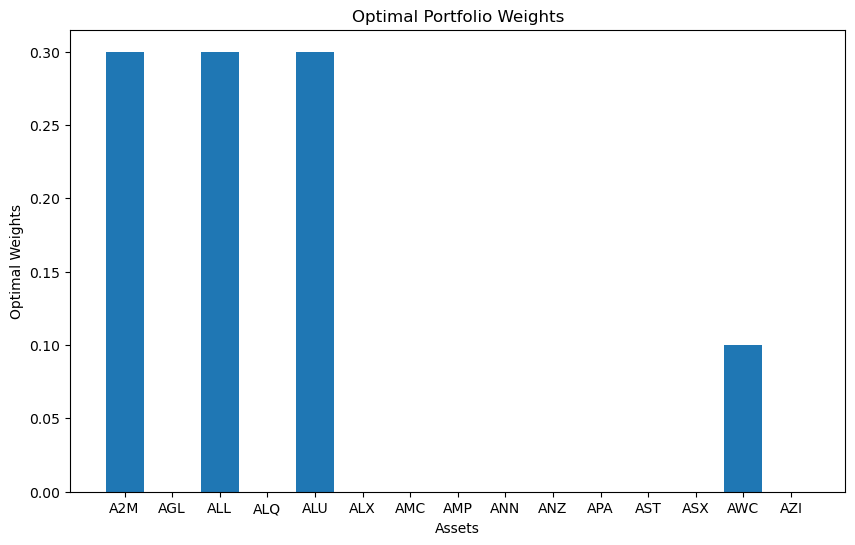

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(stocks, optimized_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

In [59]:
exp_ret=exp_return(optimized_weights,log_df)

In [60]:
exp_ret

0.3866999329458436

In [61]:
inv_stocks=[]
inv_weights=[]
for i in range(len(optimized_weights)):
    if optimized_weights[i]!=0:
        inv_stocks.append(stocks[i])
        inv_weights.append(optimized_weights[i])
        

In [62]:
inv_stocks

['A2M', 'ALL', 'ALU', 'AWC']

In [63]:
risk_rate=s

In [64]:
inv_weights

[0.3, 0.3, 0.3, 0.10000000000000256]

In [65]:
print(f'Stocks = {inv_stocks}\nWeight = {inv_weights}\nExpected Return Rate = {exp_ret*100}%\nRisk(Volitality) = {risk_rate*100}%')

Stocks = ['A2M', 'ALL', 'ALU', 'AWC']
Weight = [0.3, 0.3, 0.3, 0.10000000000000256]
Expected Return Rate = 38.66999329458436%
Risk(Volitality) = 1.0501943793682955%
